<h1> MAJOR PROJECT
<h3> Problem Statement
<h5> Our problem statement is based on the theme AI in Spam Detection and deals with how the mails we receive are classified as spam or not and prevents important mails to be reported spam. So, we feel that the solution to this problem can be a proper analysis from the spam reporter involving specific questions pointing towards what words or sentences made them question the sender’s intent to be able to categorize emails correctly. This would be carried out via simple code. The task is to classify the e-mails as spam or non-spam; hence we'll be using the classification model. We here use Naive Bayes as it works better for models performing text classification task.

<H3> SPAM FEEDBACK ANALYSIS

We have used GUI as a sample for the analysis from user.

We check the genuinty of the spam reported by asking a set of questions from the user as visible on the new window created by tkinter.

In [1]:
from tkinter import *
def demo1():
    values = []
    window = Tk()
    window.title("REPORT SPAM")
    # StringVar to store the value entered in the Entry widget
    entry_value1 = StringVar()
    entry_value2 = StringVar()
    entry_value3 = StringVar()
    entry_value4 = StringVar()
    entry_value5 = StringVar()
    Label(window, text="Q1. What is the reason? \n1. Offensive content \n2. Financial scams \n3. Not required any longer \n4. Never accessed that site/product \n5. Fake lottery/ price notifications\n6.Others").grid(row=1, column=0)
    entry1 = Entry(window, textvariable=entry_value1, bg="LightBlue")
    entry1.grid(row=1, column=1)
    Label(window, text="Q2. How frequent have you received this sender's email? \n1.Once \n2.Less than 5 \n3.Less than 10 \n4.10+").grid(row = 2, column = 0)
    entry2 = Entry(window, textvariable = entry_value2, bg = "LightBlue")
    entry2.grid(row=2, column=1)
    Label(window,text = "Q3. What were the 3 most prominent words which made you question the sender's intent?" ).grid(row = 3, column = 0)
    entry3 = Entry(window, textvariable = entry_value3, bg = "LightBlue")
    entry3.grid(row=4, column=1)
    entry4 = Entry(window, textvariable = entry_value4, bg = "LightBlue")
    entry4.grid(row=5, column=1)
    entry5 = Entry(window, textvariable = entry_value5, bg = "LightBlue")
    entry5.grid(row=6, column=1)
    def on_button_click():
        window.destroy()

    button = Button(window, text="Submit", command=on_button_click)
    button.grid(row=7, column=7, columnspan=2)

    window.mainloop()

    # Retrieve the value from the StringVar after mainloop has finished
    values = [entry_value1.get(), entry_value2.get(), entry_value3.get(), entry_value4.get(), entry_value5.get()]
    return values
demo1_result = demo1()
print(demo1_result)

2023-11-17 12:19:09.330 Python[3639:62543] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


['', '', '', '', '']


In [2]:
a = demo1_result[0].lower()
b = demo1_result[1].lower()
c = demo1_result[2].lower()
d = demo1_result[3].lower()
e = demo1_result[4].lower()

In [3]:
lst = ["free", "money", "click", "win", "prize", "congratulations", "offer", "sale", "discount", "viagra", "urgent", "act now", "limited time", "cash", "guaranteed", "million", "lottery", "unsubscribe", "opportunity", "credit card"]

Now, we provide different scores as per the inputs of the spam reporter in our Spam Feedback Ananlysis.

-Why ?
  1.	Offensive content = 3
  2.	Financial scams = 4
  3.	Not required any longer = 2
  4.	Never accessed that site/product = 2
  5.	Fake lottery/ price notifications = 3
  6.	Others = 1
  
-Frequency ?
  1.	Once = 0
  2.	Less than 5 = 1
  3.	Less than 10 = 2
  4.	10+ = 3
  
-3 most prominent words?

Score given out of 3 and words are compared with list "lst"(having the 20 most frequent words found in spam emails)

In [4]:
score = 0
if a=='1':
    score += 3
elif a=='2':
    score += 4
elif a=='3':
    score += 2
elif a=='4':
    score += 2
elif a=='5':
    score += 3
else:
    score += 1
    
if b=='1':
    score += 0
elif b=='2':
    score += 1
elif b=='3':
    score += 2
elif b=='4':
    score +=3
    
for i in lst:
    if c==i or d==i or e==i:
        score +=1
        
print(score)

7


*****The spam detection model will now come into picture iff the score >= 6*****

In [5]:
x = False
if score >= 6:
    print("CHECK FOR SPAM")
    x = True

CHECK FOR SPAM


<h2> sklearn

In the following block of code we have used the Multinomial Naive bayes model to classify mails as either spam/ ham i.e. non_spam.
The dataset used by us is - https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

In [6]:
if x == True:
    import pandas as pd
    df = pd.read_csv("emails.csv")

    print("df shape:", df.shape)

    from sklearn.model_selection import train_test_split 
    
    Y = df['Prediction']
    X = df.drop(columns = ['Prediction', 'Email No.'])

    print("(X Shape, Y Shape):", X.shape, Y.shape)


    from sklearn.naive_bayes import MultinomialNB

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
    print("(X_train Shape, Y_train Shape):", X_train.shape, Y_train.shape)
    print("(X_test Shape, Y_test Shape):", X_test.shape, Y_test.shape)

    model = MultinomialNB()
    model.fit(X_train, Y_train)
    print("Model prediction:", model.predict(X_test))
    print("Model score on test data", model.score(X_test, Y_test))
    print("Model score on training data", model.score(X_train, Y_train))
    
else:
    print("Not applicable")

df shape: (5172, 3002)
(X Shape, Y Shape): (5172, 3000) (5172,)
(X_train Shape, Y_train Shape): (4137, 3000) (4137,)
(X_test Shape, Y_test Shape): (1035, 3000) (1035,)
Model prediction: [0 0 1 ... 0 1 0]
Model score on test data 0.9545893719806763
Model score on training data 0.943437273386512


# EDA

In [7]:
import pandas as pd
df = pd.read_csv("emails.csv")

In [8]:
lst2 = df.columns

lst3 = []
for i in lst2:
    for j in lst:
        if i==j:
            lst3.append(i)
print("List 3: ", lst3)

List 3:  ['sale', 'free', 'money', 'click', 'offer', 'million', 'unsubscribe', 'cash', 'viagra', 'opportunity', 'prize', 'discount', 'guaranteed', 'urgent', 'lottery']


In [18]:
df_spam = df[df['Prediction'] == 1]

In [19]:
lst4 = []
for i in lst3:
    lst4.append(df[i].sum())
print(lst4)

[1076, 670, 365, 530, 560, 285, 143, 188, 196, 79, 101, 97, 47, 53, 40]


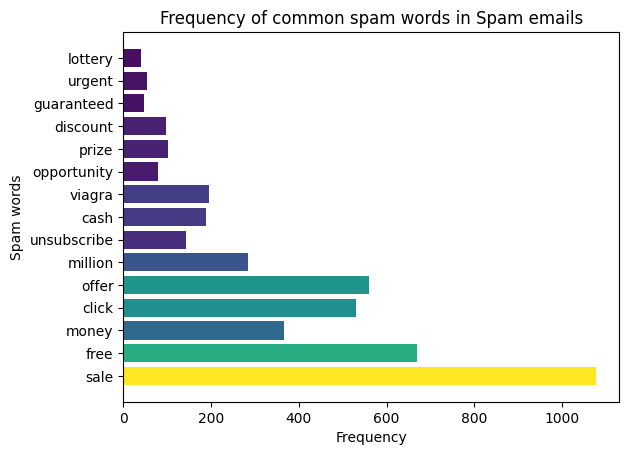

In [22]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

cmap = plt.get_cmap('viridis')

normalized_data = [float(i)/max(lst4) for i in lst4]

plt.barh(lst3, lst4, color=cmap(normalized_data))
plt.xlabel("Frequency")
plt.ylabel("Spam words")
plt.title("Frequency of common spam words in Spam emails")
plt.show()

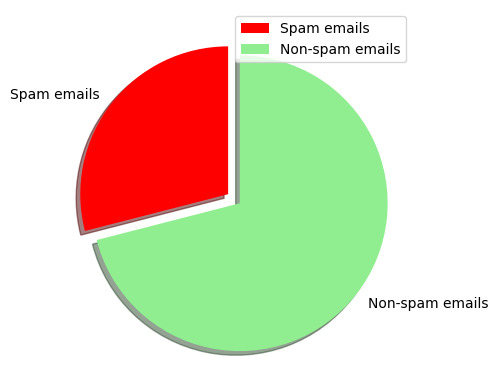

In [45]:
A = len(df[df['Prediction'] == 1])
B = len(df[df['Prediction'] == 0])
C = [A, B]

plt.pie(C, labels = ['Spam emails', 'Non-spam emails'], shadow = True, explode = [0, 0.1], startangle = 90, colors = ['red', 'lightgreen'])
plt.legend()
plt.show()